/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


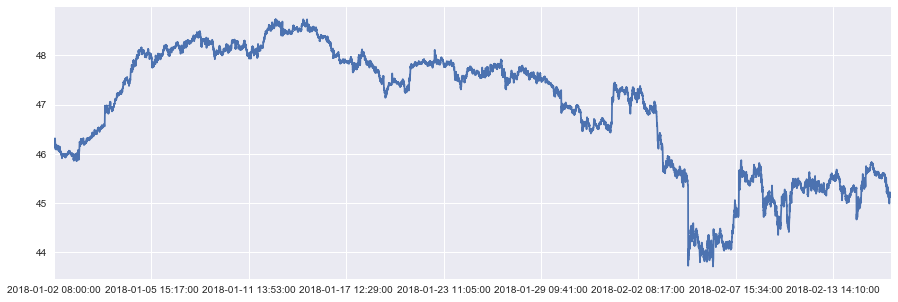

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

import networkx as nx
from statsmodels.tsa.stattools import adfuller

# read the data
# data = pd.read_csv('closing_prices_cleaned.csv')
data = pd.read_csv('closing_prices_cleaned.csv', index_col=0)

data.head()

plt.figure(figsize=(15,5))
data['FP FP Equity'].plot()

In [2]:
# Get returns / log_returns from pricing data
# rtn = data.pct_change()[1:]
rtn = data.pct_change()
log_rtn = np.log(rtn + 1)
price = np.exp(log_rtn.cumsum()) -1
rtn = rtn.iloc[1:]
log_rtn = log_rtn.iloc[1:]
price = price.iloc[1:]

In [5]:
log_rtn.index = pd.to_datetime(log_rtn.index)
log_rtn['DayOfYear'] = log_rtn.index.dayofyear

In [14]:
#for d in log_rtn['DayOfYear'].unique():
dailyData = log_rtn[log_rtn['DayOfYear'] == 2]
dailyData = dailyData.iloc[:,:-1]
dailyData.head()

BNP FP Equity  CA FP Equity  CRH ID Equity  \
2018-01-02 08:01:00      -0.000638      0.000646      -0.001253   
2018-01-02 08:02:00      -0.000639      0.000646      -0.001254   
2018-01-02 08:03:00      -0.001759      0.000645      -0.001256   
2018-01-02 08:04:00       0.003355      0.000000      -0.001258   
2018-01-02 08:05:00      -0.002076     -0.002491      -0.000503   

                     DAI GR Equity  BN FP Equity  DBK GR Equity  \
2018-01-02 08:01:00       0.000190     -0.001144      -0.000021   
2018-01-02 08:02:00       0.000190     -0.001002      -0.000021   
2018-01-02 08:03:00      -0.000333      0.000286      -0.000021   
2018-01-02 08:04:00      -0.000333     -0.003443       0.001571   
2018-01-02 08:05:00      -0.000333      0.000862       0.001569   

                     DTE GR Equity  ENEL IM Equity  ENGI FP Equity  \
2018-01-02 08:01:00      -0.001112        0.000973       -0.001393   
2018-01-02 08:02:00      -0.001114        0.000000       -0.001046   
2018-01-02 08:03:00      -0.001115        0.000972        0.000233   
2018-01-02 08:04:00      -0.001116        0.000000        0.000233   
2018-01-02 08:05:00      -0.001117       -0.000972        0.000232   

                     ENI IM Equity      ...        ABI BB Equity  \
2018-01-02 08:01:00       0.000723      ...             0.000107   
2018-01-02 08:02:00       0.000723      ...            -0.000537   
2018-01-02 08:03:00       0.001444      ...             0.000215   
2018-01-02 08:04:00       0.000721      ...            -0.000859   
2018-01-02 08:05:00      -0.002165      ...             0.000322   

                     MTS SM Equity  ASML NA Equity  G IM Equity  CS FP Equity  \
2018-01-02 08:01:00      -0.000277       -0.001035     0.003284     -0.000606   
2018-01-02 08:02:00      -0.000277       -0.002419     0.000656      0.000808   
2018-01-02 08:03:00       0.002765        0.001383     0.000000     -0.000404   
2018-01-02 08:04:00      -0.003319       -0.000346     0.000655      0.000807   
2018-01-02 08:05:00       0.001477       -0.002423    -0.001311     -0.001413   

                     BBVA SM Equity  SAN SM Equity  BAS GR Equity  \
2018-01-02 08:01:00       -0.000140      -0.002175      -0.003147   
2018-01-02 08:02:00        0.000420      -0.000908      -0.000152   
2018-01-02 08:03:00        0.000000       0.001452      -0.000217   
2018-01-02 08:04:00       -0.001121       0.001269      -0.000250   
2018-01-02 08:05:00        0.000561      -0.001450      -0.000250   

                     BAYN GR Equity  BMW GR Equity  
2018-01-02 08:01:00        0.000000       0.002646  
2018-01-02 08:02:00        0.000000       0.002639  
2018-01-02 08:03:00       -0.000795      -0.001476  
2018-01-02 08:04:00       -0.000796      -0.001478  
2018-01-02 08:05:00        0.001304      -0.001480  

[5 rows x 48 columns]

In [24]:
model = VAR(dailyData)
best_model = model.select_order(maxlags=5)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -744.7      -744.3*   4.941e-324      -744.6*
1      -744.8*       -725.4       0.000*       -737.2
2       -743.6       -705.2        0.000       -728.6
3       -742.6       -685.3        0.000       -720.2
4       -742.6       -666.2        0.000       -712.6
5       -743.6       -648.3        0.000       -706.3
* Minimum



In [25]:
best_model['aic']

{'aic': 1, 'bic': 0, 'fpe': 1, 'hqic': 0}

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -745.9      -745.5*       0.000*      -745.7*
1       -745.6       -726.2        0.000       -738.0
2       -744.2       -705.7        0.000       -729.1
3       -743.2       -685.6        0.000       -720.6
4       -743.1       -666.5        0.000       -713.1
5       -744.0       -648.2        0.000       -706.5
6       -747.0       -632.1        0.000       -702.0
7       -752.4       -618.5        0.000       -699.9
8      -763.5*       -610.5        0.000       -703.5
* Minimum



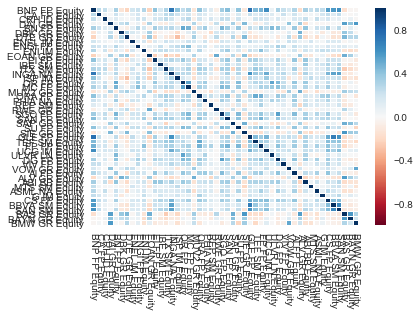

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.2      -752.8*       0.000*      -753.1*
1       -751.5       -732.1        0.000       -743.9
2       -749.4       -710.9        0.000       -734.3
3       -747.9       -690.4        0.000       -725.4
4       -746.8       -670.3        0.000       -716.8
5       -747.6       -652.0        0.000       -710.1
6       -749.5       -634.9        0.000       -704.6
7       -754.0       -620.3        0.000       -701.6
8      -764.4*       -611.6        0.000       -704.5
* Minimum



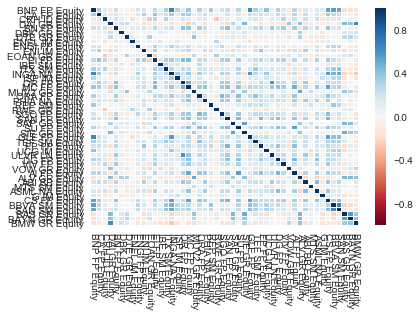

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -755.0      -754.6*       0.000*      -754.9*
1       -752.8       -733.4        0.000       -745.2
2       -749.9       -711.4        0.000       -734.8
3       -747.6       -690.0        0.000       -725.0
4       -746.9       -670.3        0.000       -716.8
5       -746.5       -650.9        0.000       -709.0
6       -748.0       -633.4        0.000       -703.1
7       -753.1       -619.4        0.000       -700.7
8      -762.7*       -610.0        0.000       -702.8
* Minimum



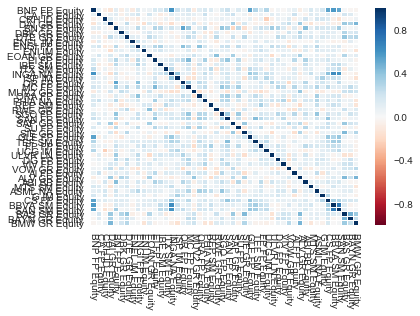

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.9      -752.5*       0.000*      -752.7*
1       -750.7       -731.3        0.000       -743.1
2       -748.2       -709.7        0.000       -733.1
3       -746.3       -688.8        0.000       -723.8
4       -745.3       -668.7        0.000       -715.2
5       -745.4       -649.8        0.000       -707.9
6       -747.4       -632.7        0.000       -702.5
7       -752.1       -618.4        0.000       -699.7
8      -762.8*       -610.0        0.000       -702.9
* Minimum



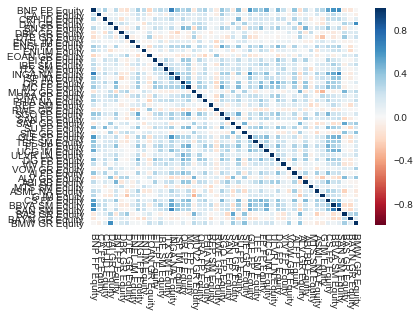

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -758.3      -758.0*       0.000*      -758.2*
1       -756.5       -737.1        0.000       -748.9
2       -754.1       -715.6        0.000       -739.0
3       -752.1       -694.6        0.000       -729.6
4       -751.1       -674.5        0.000       -721.1
5       -751.6       -656.0        0.000       -714.1
6       -753.9       -639.2        0.000       -709.0
7       -758.3       -624.6        0.000       -705.9
8      -768.1*       -615.4        0.000       -708.3
* Minimum



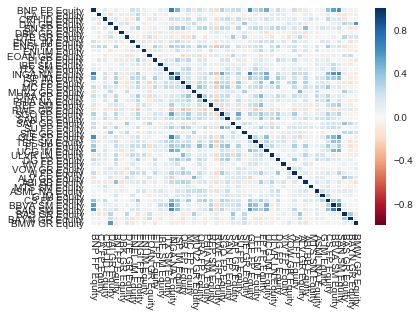

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -760.8      -760.4*       0.000*      -760.7*
1       -758.8       -739.3        0.000       -751.1
2       -756.4       -718.0        0.000       -741.4
3       -754.9       -697.4        0.000       -732.4
4       -754.1       -677.5        0.000       -724.1
5       -754.7       -659.1        0.000       -717.2
6       -756.5       -641.8        0.000       -711.5
7       -761.1       -627.4        0.000       -708.7
8      -771.7*       -618.9        0.000       -711.8
* Minimum



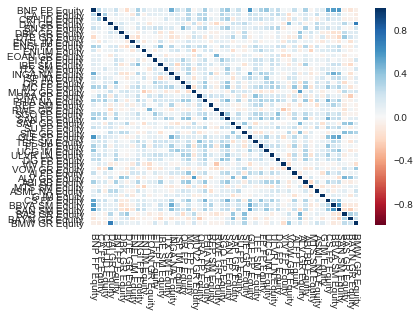

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -746.3      -745.9*       0.000*      -746.1*
1       -744.1       -724.7        0.000       -736.5
2       -741.5       -703.0        0.000       -726.4
3       -739.1       -681.6        0.000       -716.6
4       -737.9       -661.3        0.000       -707.9
5       -738.3       -642.7        0.000       -700.8
6       -739.9       -625.2        0.000       -694.9
7       -744.2       -610.5        0.000       -691.8
8      -754.0*       -601.3        0.000       -694.1
* Minimum



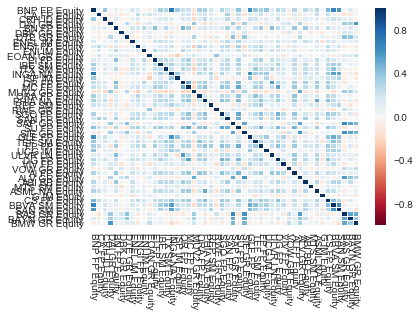

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -749.9      -749.5*       0.000*      -749.7*
1       -747.7       -728.2        0.000       -740.1
2       -744.8       -706.3        0.000       -729.7
3       -742.9       -685.4        0.000       -720.3
4       -741.6       -665.1        0.000       -711.6
5       -741.8       -646.2        0.000       -704.3
6       -743.2       -628.5        0.000       -698.3
7       -747.5       -613.8        0.000       -695.1
8      -756.2*       -603.5        0.000       -696.4
* Minimum



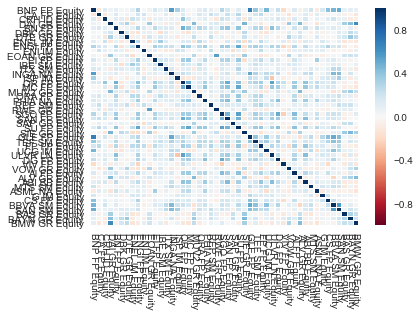

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.9      -753.5*       0.000*      -753.7*
1       -751.9       -732.5        0.000       -744.3
2       -749.5       -711.0        0.000       -734.4
3       -747.6       -690.1        0.000       -725.1
4       -746.4       -669.9        0.000       -716.4
5       -746.8       -651.2        0.000       -709.3
6       -748.5       -633.9        0.000       -703.6
7       -753.2       -619.5        0.000       -700.8
8      -763.7*       -610.9        0.000       -703.8
* Minimum



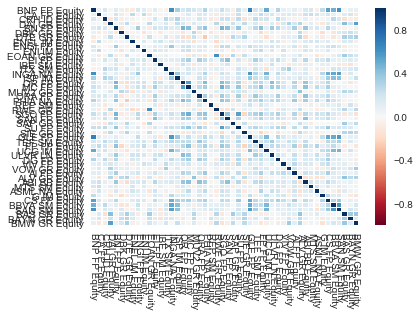

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -767.4      -767.0*       0.000*      -767.2*
1       -766.1       -746.7        0.000       -758.5
2       -763.9       -725.4        0.000       -748.8
3       -762.0       -704.5        0.000       -739.4
4       -761.5       -685.0        0.000       -731.5
5       -762.0       -666.4        0.000       -724.5
6       -763.8       -649.1        0.000       -718.8
7       -769.3       -635.6        0.000       -716.9
8      -780.0*       -627.3        0.000       -720.1
* Minimum



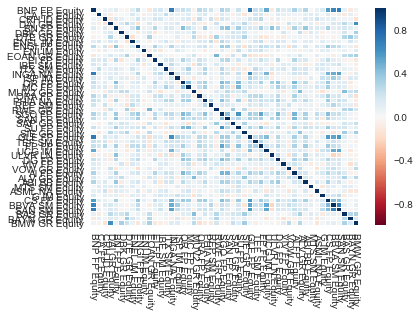

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.4      -752.0*       0.000*      -752.3*
1       -750.4       -731.0        0.000       -742.8
2       -747.6       -709.1        0.000       -732.5
3       -745.2       -687.7        0.000       -722.6
4       -744.0       -667.4        0.000       -714.0
5       -744.4       -648.8        0.000       -706.9
6       -746.1       -631.5        0.000       -701.2
7       -750.8       -617.1        0.000       -698.4
8      -761.1*       -608.4        0.000       -701.2
* Minimum



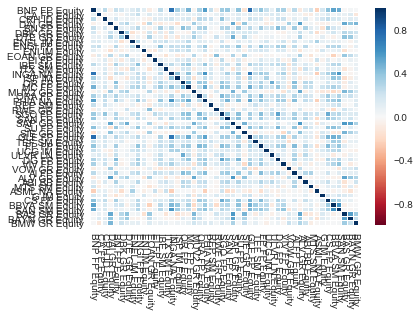

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.5      -752.1*       0.000*      -752.3*
1       -750.6       -731.2        0.000       -743.0
2       -748.3       -709.8        0.000       -733.2
3       -746.5       -689.0        0.000       -723.9
4       -745.5       -669.0        0.000       -715.5
5       -745.9       -650.3        0.000       -708.5
6       -748.0       -633.4        0.000       -703.1
7       -753.2       -619.5        0.000       -700.8
8      -762.9*       -610.2        0.000       -703.1
* Minimum



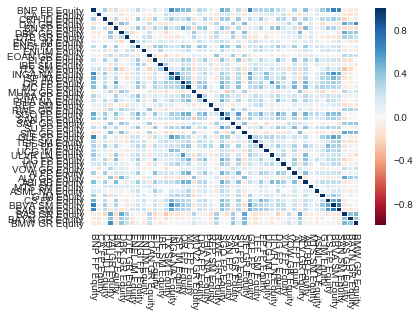

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.2      -752.8*       0.000*      -753.1*
1       -751.2       -731.8        0.000       -743.6
2       -748.8       -710.3        0.000       -733.7
3       -747.1       -689.6        0.000       -724.5
4       -745.9       -669.4        0.000       -715.9
5       -746.8       -651.1        0.000       -709.3
6       -748.7       -634.1        0.000       -703.8
7       -753.9       -620.2        0.000       -701.5
8      -763.3*       -610.5        0.000       -703.4
* Minimum



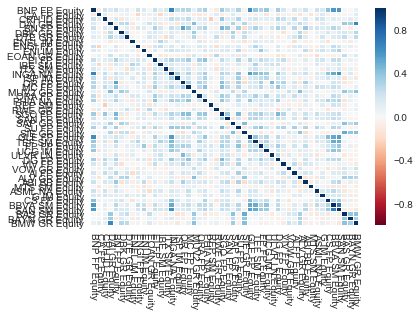

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -754.0      -753.6*       0.000*      -753.9*
1       -752.0       -732.6        0.000       -744.4
2       -749.4       -710.9        0.000       -734.3
3       -747.2       -689.7        0.000       -724.6
4       -746.3       -669.8        0.000       -716.3
5       -746.2       -650.6        0.000       -708.8
6       -747.8       -633.2        0.000       -702.9
7       -753.0       -619.3        0.000       -700.6
8      -762.4*       -609.7        0.000       -702.6
* Minimum



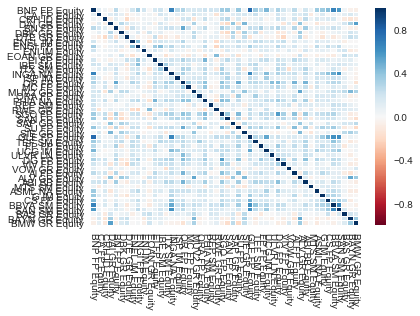

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -756.1      -755.7*       0.000*      -755.9*
1       -754.6       -735.1        0.000       -746.9
2       -752.0       -713.6        0.000       -737.0
3       -750.0       -692.5        0.000       -727.5
4       -748.5       -671.9        0.000       -718.5
5       -748.6       -652.9        0.000       -711.1
6       -750.3       -635.7        0.000       -705.4
7       -754.7       -621.0        0.000       -702.3
8      -764.3*       -611.6        0.000       -704.5
* Minimum



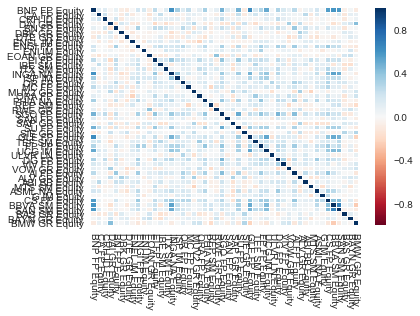

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -751.3      -750.9*       0.000*      -751.1*
1       -749.6       -730.1        0.000       -741.9
2       -747.5       -709.0        0.000       -732.4
3       -745.9       -688.4        0.000       -723.4
4       -745.0       -668.4        0.000       -715.0
5       -745.2       -649.6        0.000       -707.8
6       -747.4       -632.7        0.000       -702.4
7       -752.2       -618.5        0.000       -699.8
8      -763.8*       -611.0        0.000       -703.9
* Minimum



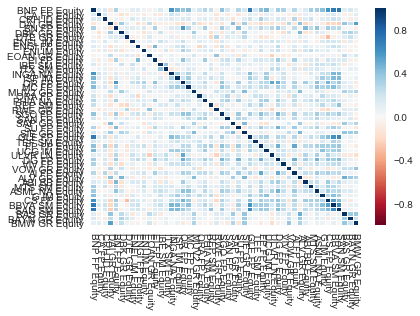

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -757.4      -757.0*       0.000*      -757.2*
1       -755.0       -735.6        0.000       -747.4
2       -752.7       -714.2        0.000       -737.6
3       -750.9       -693.4        0.000       -728.3
4       -749.7       -673.1        0.000       -719.7
5       -749.5       -653.9        0.000       -712.0
6       -751.3       -636.6        0.000       -706.3
7       -754.8       -621.1        0.000       -702.4
8      -765.4*       -612.7        0.000       -705.5
* Minimum



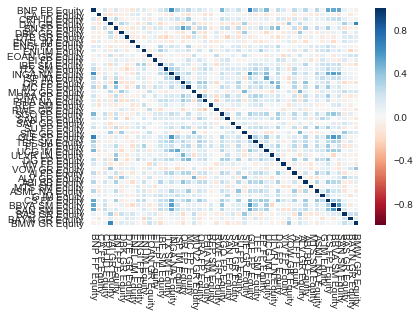

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -741.5      -741.1*   9.387e-323      -741.3*
1       -739.4       -719.9       0.000*       -731.8
2       -736.7       -698.2        0.000       -721.6
3       -734.9       -677.4        0.000       -712.4
4       -734.2       -657.6        0.000       -704.2
5       -734.3       -638.7        0.000       -696.8
6       -736.4       -621.7        0.000       -691.4
7       -740.7       -607.0        0.000       -688.3
8      -751.3*       -598.5        0.000       -691.4
* Minimum



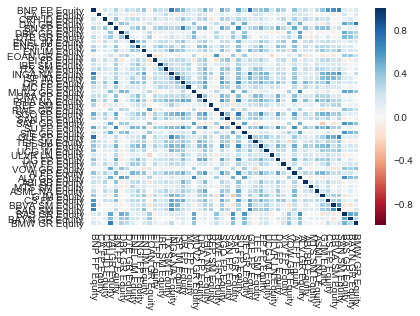

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -758.0      -757.6*       0.000*      -757.9*
1       -756.8       -737.3        0.000       -749.1
2       -754.8       -716.3        0.000       -739.7
3       -753.0       -695.5        0.000       -730.4
4       -751.8       -675.2        0.000       -721.7
5       -752.1       -656.5        0.000       -714.6
6       -754.6       -640.0        0.000       -709.7
7       -760.2       -626.5        0.000       -707.8
8      -770.9*       -618.2        0.000       -711.0
* Minimum



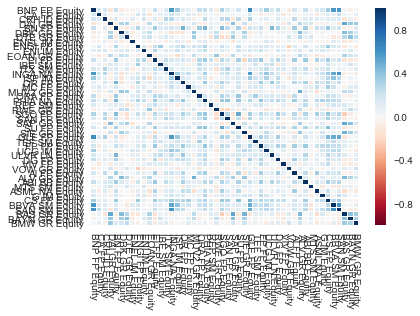

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -764.5      -764.1*       0.000*      -764.4*
1       -763.4       -743.9        0.000       -755.8
2       -761.2       -722.7        0.000       -746.1
3       -759.7       -702.2        0.000       -737.2
4       -758.9       -682.3        0.000       -728.8
5       -760.1       -664.4        0.000       -722.6
6       -762.0       -647.3        0.000       -717.1
7       -766.9       -633.2        0.000       -714.5
8      -778.0*       -625.2        0.000       -718.1
* Minimum



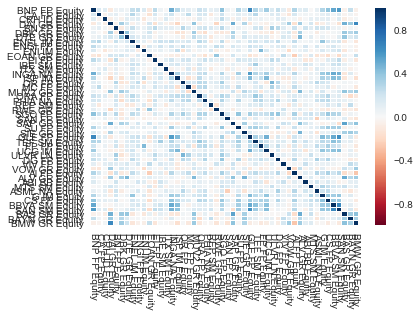

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -746.7      -746.3*       0.000*      -746.6*
1       -744.9       -725.5        0.000       -737.3
2       -742.6       -704.1        0.000       -727.5
3       -740.6       -683.1        0.000       -718.1
4       -739.9       -663.3        0.000       -709.9
5       -740.4       -644.8        0.000       -702.9
6       -742.8       -628.1        0.000       -697.9
7       -747.5       -613.8        0.000       -695.1
8      -758.5*       -605.8        0.000       -698.6
* Minimum



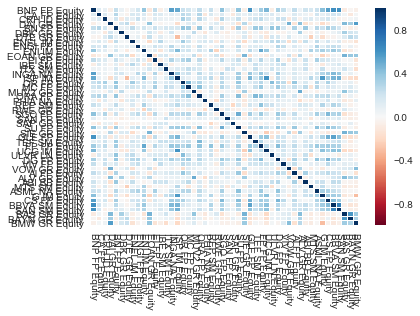

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.7      -752.4*       0.000*      -752.6*
1       -750.9       -731.5        0.000       -743.3
2       -748.8       -710.3        0.000       -733.7
3       -746.9       -689.4        0.000       -724.4
4       -746.6       -670.0        0.000       -716.6
5       -747.0       -651.4        0.000       -709.6
6       -749.1       -634.5        0.000       -704.2
7       -754.5       -620.8        0.000       -702.1
8      -764.7*       -612.0        0.000       -704.9
* Minimum



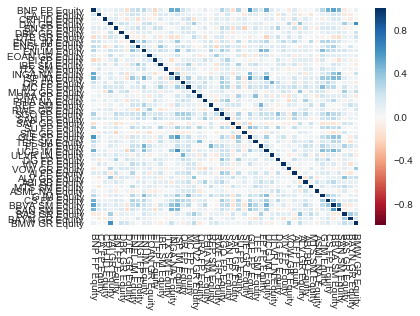

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -737.2      -736.8*   6.685e-321      -737.1*
1       -735.1       -715.6   4.878e-320       -727.5
2       -732.9       -694.4       0.000*       -717.8
3       -731.1       -673.5        0.000       -708.5
4       -730.5       -653.9        0.000       -700.5
5       -731.3       -635.7        0.000       -693.8
6       -733.3       -618.6        0.000       -688.3
7       -738.1       -604.4        0.000       -685.6
8      -748.3*       -595.5        0.000       -688.4
* Minimum



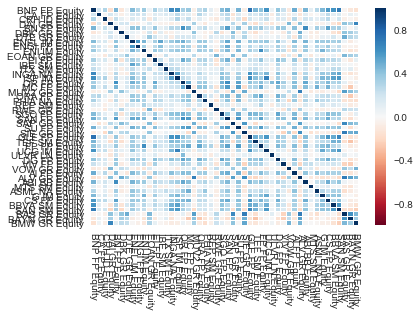

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -735.1      -734.7*   5.771e-320      -734.9*
1       -732.8       -713.4   5.366e-319       -725.2
2       -730.2       -691.7       0.000*       -715.1
3       -727.9       -670.4        0.000       -705.3
4       -726.9       -650.3        0.000       -696.9
5       -727.0       -631.4        0.000       -689.5
6       -728.8       -614.2        0.000       -683.9
7       -734.9       -601.2        0.000       -682.5
8      -745.9*       -593.2        0.000       -686.1
* Minimum



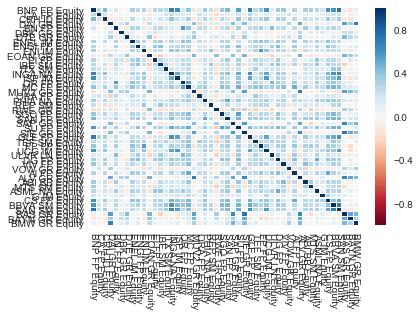

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -723.3      -722.9*   7.791e-315      -723.1*
1       -725.8       -706.4   6.029e-316       -718.2
2       -724.7       -686.3   2.356e-315       -709.7
3       -723.8       -666.3       0.000*       -701.3
4       -723.0       -646.4        0.000       -693.0
5       -723.4       -627.8        0.000       -685.9
6       -726.2       -611.5        0.000       -681.2
7       -731.4       -597.7        0.000       -679.0
8      -742.5*       -589.7        0.000       -682.6
* Minimum



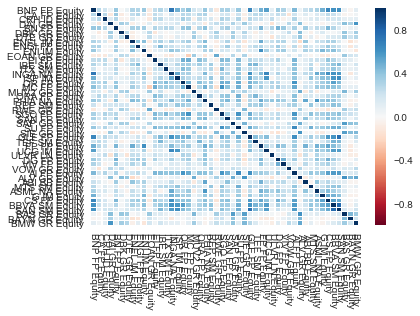

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -684.1      -683.7*   7.836e-298      -684.0*
1       -686.0       -666.5   1.269e-298       -678.3
2       -686.4       -648.0   9.474e-299       -671.4
3       -686.2       -628.6   2.142e-298       -663.6
4       -687.6       -611.0   1.588e-298       -657.6
5       -689.8       -594.2   1.202e-298       -652.3
6       -693.1       -578.4       0.000*       -648.2
7       -698.0       -564.3        0.000       -645.6
8      -709.5*       -556.8        0.000       -649.7
* Minimum



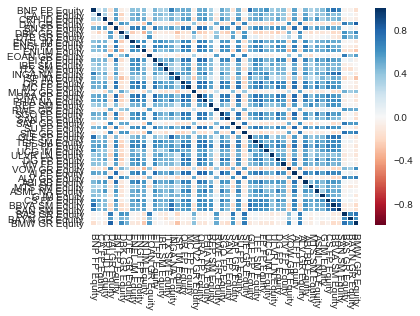

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -717.5      -717.1*   2.603e-312      -717.3*
1       -717.3       -697.9   3.092e-312       -709.7
2       -716.1       -677.6   1.309e-311       -701.0
3       -714.6       -657.1   9.639e-311       -692.0
4       -714.5       -637.9       0.000*       -684.5
5       -715.2       -619.5        0.000       -677.7
6       -717.5       -602.8        0.000       -672.6
7       -722.7       -589.0        0.000       -670.3
8      -733.5*       -580.8        0.000       -673.6
* Minimum



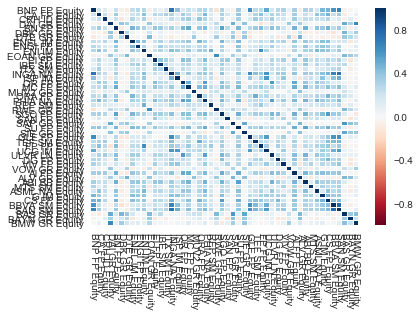

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -726.2      -725.8*   3.978e-316      -726.1*
1       -724.2       -704.7   3.278e-315       -716.5
2       -721.7       -683.2   4.476e-314       -706.6
3       -719.9       -662.4       0.000*       -697.3
4       -719.1       -642.5        0.000       -689.0
5       -719.1       -623.5        0.000       -681.6
6       -721.2       -606.5        0.000       -676.3
7       -725.9       -592.2        0.000       -673.5
8      -736.2*       -583.4        0.000       -676.3
* Minimum



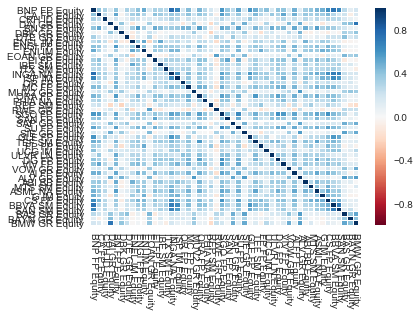

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -707.0      -706.6*   8.975e-308      -706.8*
1       -705.2       -685.8   5.553e-307       -697.6
2       -702.7       -664.2   8.101e-306       -687.6
3       -700.9       -643.3   8.837e-305       -678.3
4       -699.5       -623.0   1.005e-303       -669.5
5       -700.3       -604.7       0.000*       -662.8
6       -702.0       -587.3        0.000       -657.0
7       -706.9       -573.2        0.000       -654.5
8      -716.8*       -564.1        0.000       -657.0
* Minimum



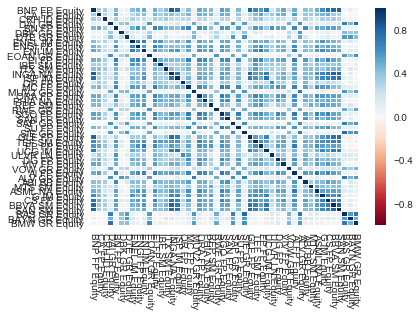

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -736.2      -735.8*   1.865e-320      -736.0*
1       -735.5       -716.1   4.878e-320       -727.9
2       -733.5       -695.0       0.000*       -718.4
3       -732.6       -675.0        0.000       -710.0
4       -731.5       -654.9        0.000       -701.5
5       -732.0       -636.3        0.000       -694.5
6       -734.7       -620.0        0.000       -689.8
7       -740.4       -606.7        0.000       -688.0
8      -752.4*       -599.7        0.000       -692.6
* Minimum



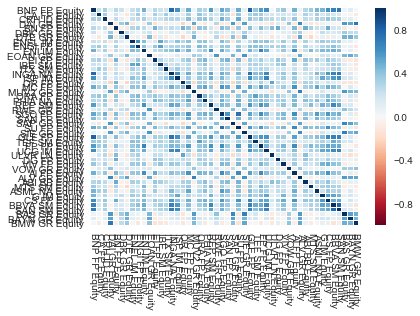

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -748.1      -747.7*       0.000*      -747.9*
1       -746.8       -727.3        0.000       -739.2
2       -744.9       -706.5        0.000       -729.9
3       -743.2       -685.7        0.000       -720.7
4       -742.6       -666.0        0.000       -712.6
5       -743.1       -647.5        0.000       -705.7
6       -744.9       -630.3        0.000       -700.0
7       -750.5       -616.8        0.000       -698.1
8      -761.3*       -608.5        0.000       -701.4
* Minimum



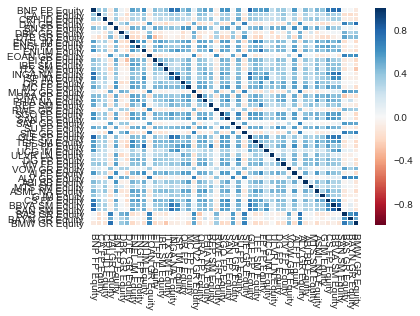

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -730.4      -730.1*   5.894e-318      -730.3*
1       -729.6       -710.2   1.356e-317       -722.0
2       -727.8       -689.3       0.000*       -712.7
3       -726.4       -668.8        0.000       -703.8
4       -726.1       -649.5        0.000       -696.1
5       -727.1       -631.5        0.000       -689.6
6       -729.5       -614.8        0.000       -684.5
7       -735.4       -601.7        0.000       -683.0
8      -745.9*       -593.1        0.000       -686.0
* Minimum



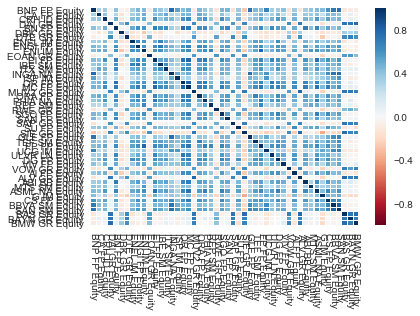

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -736.8      -736.4*   1.015e-320      -736.7*
1       -735.0       -715.6   4.878e-320       -727.4
2       -732.6       -694.1       0.000*       -717.5
3       -730.9       -673.4        0.000       -708.4
4       -729.9       -653.4        0.000       -699.9
5       -730.3       -634.7        0.000       -692.8
6       -732.1       -617.5        0.000       -687.2
7       -735.8       -602.1        0.000       -683.4
8      -746.0*       -593.2        0.000       -686.1
* Minimum



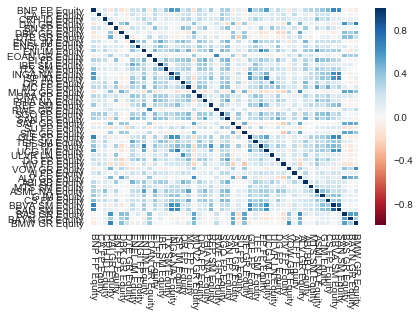

In [53]:
for d in log_rtn['DayOfYear'].unique():
    dailyData = log_rtn[log_rtn['DayOfYear'] == d]
    # remove the last column that specifies the dayOfTheYear
    dailyData = dailyData.iloc[:,:-1]
    model = VAR(dailyData)
    # create a dict with all the orders
    best_model = model.select_order(maxlags=8)
    best_model
    aic = best_model['aic']
    bic = best_model['bic']
    res = model.fit(maxlags=aic, ic='aic')
    corrMat = pd.DataFrame(res.resid_corr, columns=res.names, index=res.names)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(corrMat, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False)
    plt.xticks(rotation=270)
    plt.show()


                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -745.9      -745.5*       0.000*      -745.7*
1       -745.6       -726.2        0.000       -738.0
2       -744.2       -705.7        0.000       -729.1
3       -743.2       -685.6        0.000       -720.6
4       -743.1       -666.5        0.000       -713.1
5       -744.0       -648.2        0.000       -706.5
6       -747.0       -632.1        0.000       -702.0
7       -752.4       -618.5        0.000       -699.9
8      -763.5*       -610.5        0.000       -703.5
* Minimum



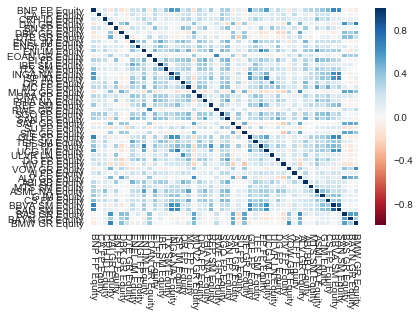

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.2      -752.8*       0.000*      -753.1*
1       -751.5       -732.1        0.000       -743.9
2       -749.4       -710.9        0.000       -734.3
3       -747.9       -690.4        0.000       -725.4
4       -746.8       -670.3        0.000       -716.8
5       -747.6       -652.0        0.000       -710.1
6       -749.5       -634.9        0.000       -704.6
7       -754.0       -620.3        0.000       -701.6
8      -764.4*       -611.6        0.000       -704.5
* Minimum



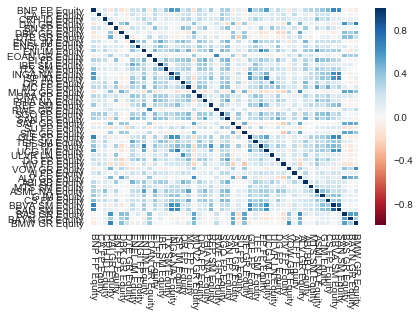

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -755.0      -754.6*       0.000*      -754.9*
1       -752.8       -733.4        0.000       -745.2
2       -749.9       -711.4        0.000       -734.8
3       -747.6       -690.0        0.000       -725.0
4       -746.9       -670.3        0.000       -716.8
5       -746.5       -650.9        0.000       -709.0
6       -748.0       -633.4        0.000       -703.1
7       -753.1       -619.4        0.000       -700.7
8      -762.7*       -610.0        0.000       -702.8
* Minimum



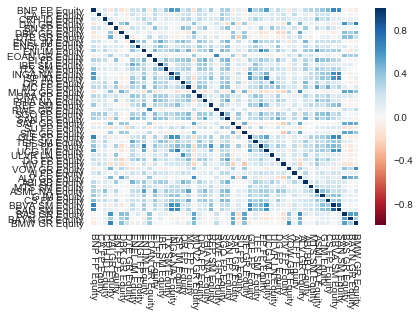

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.9      -752.5*       0.000*      -752.7*
1       -750.7       -731.3        0.000       -743.1
2       -748.2       -709.7        0.000       -733.1
3       -746.3       -688.8        0.000       -723.8
4       -745.3       -668.7        0.000       -715.2
5       -745.4       -649.8        0.000       -707.9
6       -747.4       -632.7        0.000       -702.5
7       -752.1       -618.4        0.000       -699.7
8      -762.8*       -610.0        0.000       -702.9
* Minimum



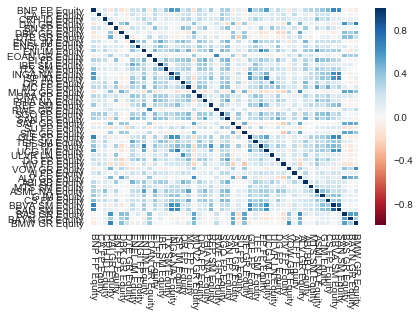

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -758.3      -758.0*       0.000*      -758.2*
1       -756.5       -737.1        0.000       -748.9
2       -754.1       -715.6        0.000       -739.0
3       -752.1       -694.6        0.000       -729.6
4       -751.1       -674.5        0.000       -721.1
5       -751.6       -656.0        0.000       -714.1
6       -753.9       -639.2        0.000       -709.0
7       -758.3       -624.6        0.000       -705.9
8      -768.1*       -615.4        0.000       -708.3
* Minimum



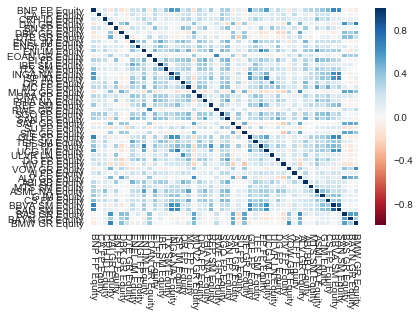

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -760.8      -760.4*       0.000*      -760.7*
1       -758.8       -739.3        0.000       -751.1
2       -756.4       -718.0        0.000       -741.4
3       -754.9       -697.4        0.000       -732.4
4       -754.1       -677.5        0.000       -724.1
5       -754.7       -659.1        0.000       -717.2
6       -756.5       -641.8        0.000       -711.5
7       -761.1       -627.4        0.000       -708.7
8      -771.7*       -618.9        0.000       -711.8
* Minimum



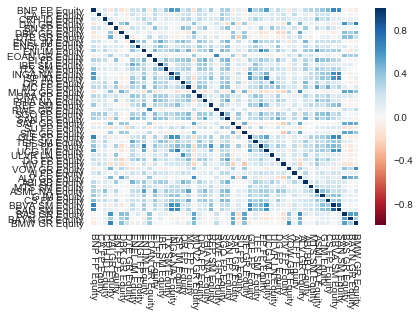

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -746.3      -745.9*       0.000*      -746.1*
1       -744.1       -724.7        0.000       -736.5
2       -741.5       -703.0        0.000       -726.4
3       -739.1       -681.6        0.000       -716.6
4       -737.9       -661.3        0.000       -707.9
5       -738.3       -642.7        0.000       -700.8
6       -739.9       -625.2        0.000       -694.9
7       -744.2       -610.5        0.000       -691.8
8      -754.0*       -601.3        0.000       -694.1
* Minimum



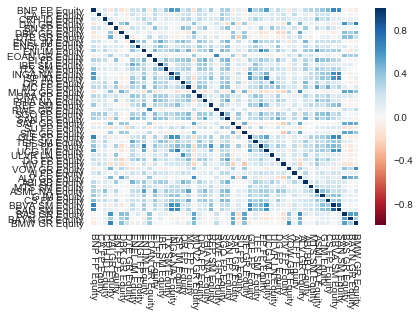

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -749.9      -749.5*       0.000*      -749.7*
1       -747.7       -728.2        0.000       -740.1
2       -744.8       -706.3        0.000       -729.7
3       -742.9       -685.4        0.000       -720.3
4       -741.6       -665.1        0.000       -711.6
5       -741.8       -646.2        0.000       -704.3
6       -743.2       -628.5        0.000       -698.3
7       -747.5       -613.8        0.000       -695.1
8      -756.2*       -603.5        0.000       -696.4
* Minimum



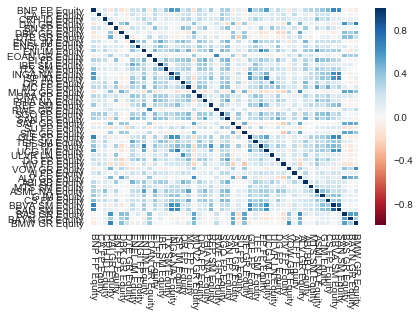

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.9      -753.5*       0.000*      -753.7*
1       -751.9       -732.5        0.000       -744.3
2       -749.5       -711.0        0.000       -734.4
3       -747.6       -690.1        0.000       -725.1
4       -746.4       -669.9        0.000       -716.4
5       -746.8       -651.2        0.000       -709.3
6       -748.5       -633.9        0.000       -703.6
7       -753.2       -619.5        0.000       -700.8
8      -763.7*       -610.9        0.000       -703.8
* Minimum



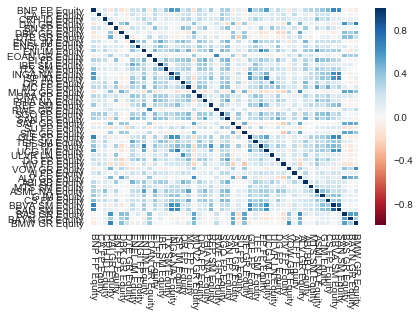

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -767.4      -767.0*       0.000*      -767.2*
1       -766.1       -746.7        0.000       -758.5
2       -763.9       -725.4        0.000       -748.8
3       -762.0       -704.5        0.000       -739.4
4       -761.5       -685.0        0.000       -731.5
5       -762.0       -666.4        0.000       -724.5
6       -763.8       -649.1        0.000       -718.8
7       -769.3       -635.6        0.000       -716.9
8      -780.0*       -627.3        0.000       -720.1
* Minimum



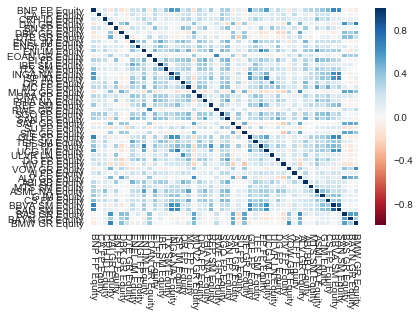

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.4      -752.0*       0.000*      -752.3*
1       -750.4       -731.0        0.000       -742.8
2       -747.6       -709.1        0.000       -732.5
3       -745.2       -687.7        0.000       -722.6
4       -744.0       -667.4        0.000       -714.0
5       -744.4       -648.8        0.000       -706.9
6       -746.1       -631.5        0.000       -701.2
7       -750.8       -617.1        0.000       -698.4
8      -761.1*       -608.4        0.000       -701.2
* Minimum



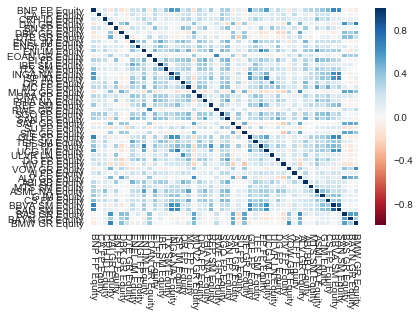

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.5      -752.1*       0.000*      -752.3*
1       -750.6       -731.2        0.000       -743.0
2       -748.3       -709.8        0.000       -733.2
3       -746.5       -689.0        0.000       -723.9
4       -745.5       -669.0        0.000       -715.5
5       -745.9       -650.3        0.000       -708.5
6       -748.0       -633.4        0.000       -703.1
7       -753.2       -619.5        0.000       -700.8
8      -762.9*       -610.2        0.000       -703.1
* Minimum



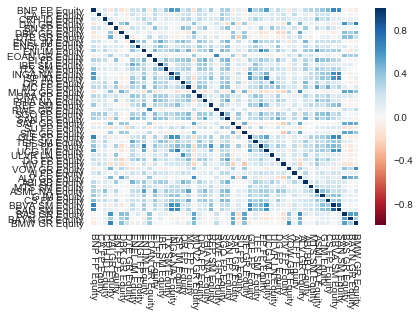

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -753.2      -752.8*       0.000*      -753.1*
1       -751.2       -731.8        0.000       -743.6
2       -748.8       -710.3        0.000       -733.7
3       -747.1       -689.6        0.000       -724.5
4       -745.9       -669.4        0.000       -715.9
5       -746.8       -651.1        0.000       -709.3
6       -748.7       -634.1        0.000       -703.8
7       -753.9       -620.2        0.000       -701.5
8      -763.3*       -610.5        0.000       -703.4
* Minimum



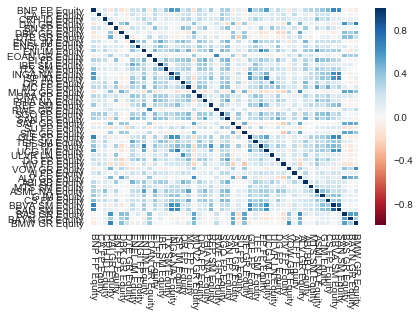

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -754.0      -753.6*       0.000*      -753.9*
1       -752.0       -732.6        0.000       -744.4
2       -749.4       -710.9        0.000       -734.3
3       -747.2       -689.7        0.000       -724.6
4       -746.3       -669.8        0.000       -716.3
5       -746.2       -650.6        0.000       -708.8
6       -747.8       -633.2        0.000       -702.9
7       -753.0       -619.3        0.000       -700.6
8      -762.4*       -609.7        0.000       -702.6
* Minimum



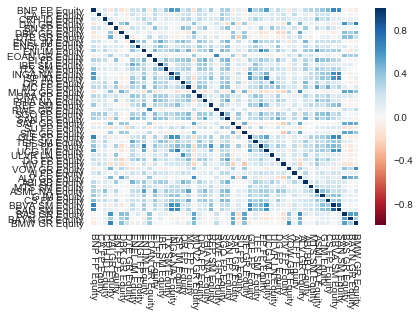

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -756.1      -755.7*       0.000*      -755.9*
1       -754.6       -735.1        0.000       -746.9
2       -752.0       -713.6        0.000       -737.0
3       -750.0       -692.5        0.000       -727.5
4       -748.5       -671.9        0.000       -718.5
5       -748.6       -652.9        0.000       -711.1
6       -750.3       -635.7        0.000       -705.4
7       -754.7       -621.0        0.000       -702.3
8      -764.3*       -611.6        0.000       -704.5
* Minimum



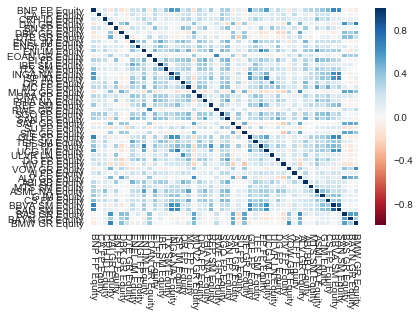

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -751.3      -750.9*       0.000*      -751.1*
1       -749.6       -730.1        0.000       -741.9
2       -747.5       -709.0        0.000       -732.4
3       -745.9       -688.4        0.000       -723.4
4       -745.0       -668.4        0.000       -715.0
5       -745.2       -649.6        0.000       -707.8
6       -747.4       -632.7        0.000       -702.4
7       -752.2       -618.5        0.000       -699.8
8      -763.8*       -611.0        0.000       -703.9
* Minimum



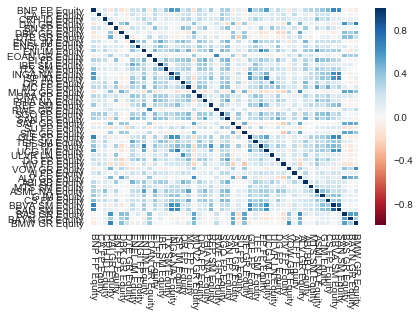

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -757.4      -757.0*       0.000*      -757.2*
1       -755.0       -735.6        0.000       -747.4
2       -752.7       -714.2        0.000       -737.6
3       -750.9       -693.4        0.000       -728.3
4       -749.7       -673.1        0.000       -719.7
5       -749.5       -653.9        0.000       -712.0
6       -751.3       -636.6        0.000       -706.3
7       -754.8       -621.1        0.000       -702.4
8      -765.4*       -612.7        0.000       -705.5
* Minimum



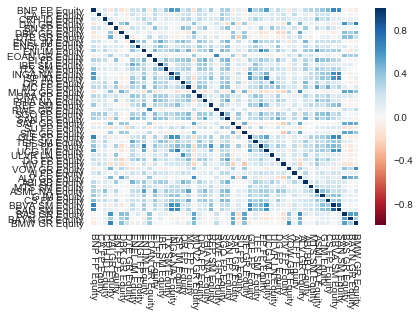

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -741.5      -741.1*   9.387e-323      -741.3*
1       -739.4       -719.9       0.000*       -731.8
2       -736.7       -698.2        0.000       -721.6
3       -734.9       -677.4        0.000       -712.4
4       -734.2       -657.6        0.000       -704.2
5       -734.3       -638.7        0.000       -696.8
6       -736.4       -621.7        0.000       -691.4
7       -740.7       -607.0        0.000       -688.3
8      -751.3*       -598.5        0.000       -691.4
* Minimum



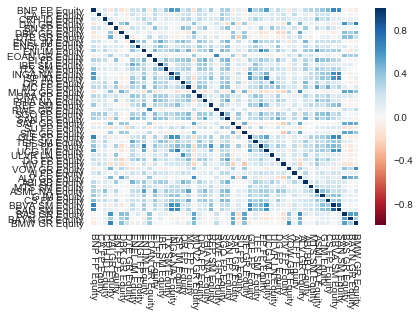

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -758.0      -757.6*       0.000*      -757.9*
1       -756.8       -737.3        0.000       -749.1
2       -754.8       -716.3        0.000       -739.7
3       -753.0       -695.5        0.000       -730.4
4       -751.8       -675.2        0.000       -721.7
5       -752.1       -656.5        0.000       -714.6
6       -754.6       -640.0        0.000       -709.7
7       -760.2       -626.5        0.000       -707.8
8      -770.9*       -618.2        0.000       -711.0
* Minimum



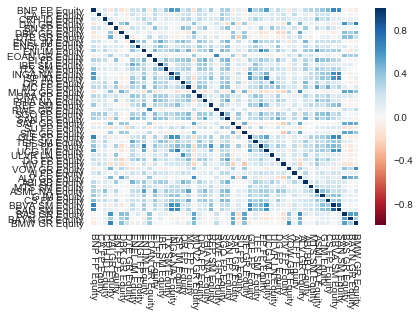

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -764.5      -764.1*       0.000*      -764.4*
1       -763.4       -743.9        0.000       -755.8
2       -761.2       -722.7        0.000       -746.1
3       -759.7       -702.2        0.000       -737.2
4       -758.9       -682.3        0.000       -728.8
5       -760.1       -664.4        0.000       -722.6
6       -762.0       -647.3        0.000       -717.1
7       -766.9       -633.2        0.000       -714.5
8      -778.0*       -625.2        0.000       -718.1
* Minimum



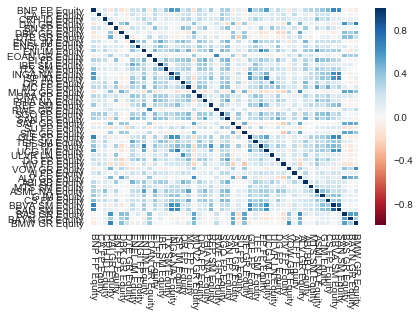

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -746.7      -746.3*       0.000*      -746.6*
1       -744.9       -725.5        0.000       -737.3
2       -742.6       -704.1        0.000       -727.5
3       -740.6       -683.1        0.000       -718.1
4       -739.9       -663.3        0.000       -709.9
5       -740.4       -644.8        0.000       -702.9
6       -742.8       -628.1        0.000       -697.9
7       -747.5       -613.8        0.000       -695.1
8      -758.5*       -605.8        0.000       -698.6
* Minimum



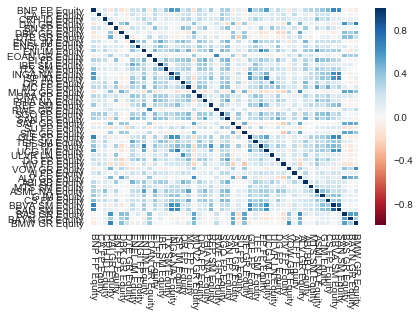

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -752.7      -752.4*       0.000*      -752.6*
1       -750.9       -731.5        0.000       -743.3
2       -748.8       -710.3        0.000       -733.7
3       -746.9       -689.4        0.000       -724.4
4       -746.6       -670.0        0.000       -716.6
5       -747.0       -651.4        0.000       -709.6
6       -749.1       -634.5        0.000       -704.2
7       -754.5       -620.8        0.000       -702.1
8      -764.7*       -612.0        0.000       -704.9
* Minimum



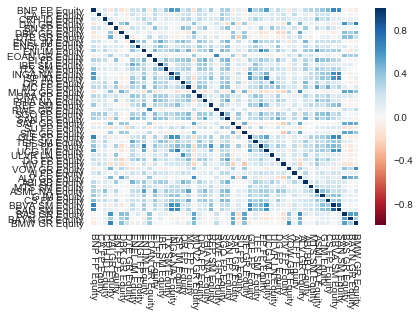

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -737.2      -736.8*   6.685e-321      -737.1*
1       -735.1       -715.6   4.878e-320       -727.5
2       -732.9       -694.4       0.000*       -717.8
3       -731.1       -673.5        0.000       -708.5
4       -730.5       -653.9        0.000       -700.5
5       -731.3       -635.7        0.000       -693.8
6       -733.3       -618.6        0.000       -688.3
7       -738.1       -604.4        0.000       -685.6
8      -748.3*       -595.5        0.000       -688.4
* Minimum



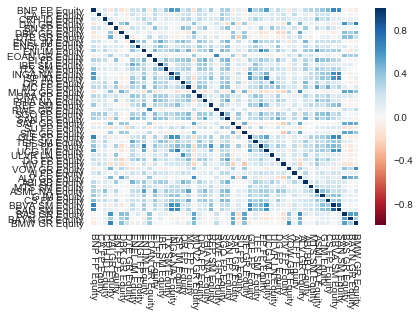

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -735.1      -734.7*   5.771e-320      -734.9*
1       -732.8       -713.4   5.366e-319       -725.2
2       -730.2       -691.7       0.000*       -715.1
3       -727.9       -670.4        0.000       -705.3
4       -726.9       -650.3        0.000       -696.9
5       -727.0       -631.4        0.000       -689.5
6       -728.8       -614.2        0.000       -683.9
7       -734.9       -601.2        0.000       -682.5
8      -745.9*       -593.2        0.000       -686.1
* Minimum



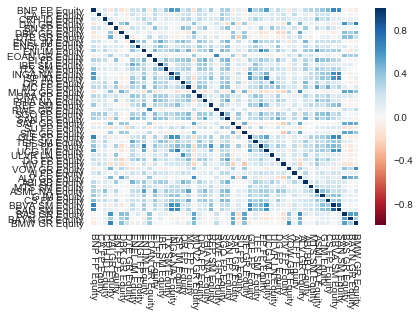

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -723.3      -722.9*   7.791e-315      -723.1*
1       -725.8       -706.4   6.029e-316       -718.2
2       -724.7       -686.3   2.356e-315       -709.7
3       -723.8       -666.3       0.000*       -701.3
4       -723.0       -646.4        0.000       -693.0
5       -723.4       -627.8        0.000       -685.9
6       -726.2       -611.5        0.000       -681.2
7       -731.4       -597.7        0.000       -679.0
8      -742.5*       -589.7        0.000       -682.6
* Minimum



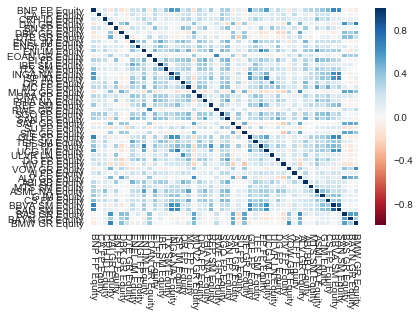

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -684.1      -683.7*   7.836e-298      -684.0*
1       -686.0       -666.5   1.269e-298       -678.3
2       -686.4       -648.0   9.474e-299       -671.4
3       -686.2       -628.6   2.142e-298       -663.6
4       -687.6       -611.0   1.588e-298       -657.6
5       -689.8       -594.2   1.202e-298       -652.3
6       -693.1       -578.4       0.000*       -648.2
7       -698.0       -564.3        0.000       -645.6
8      -709.5*       -556.8        0.000       -649.7
* Minimum



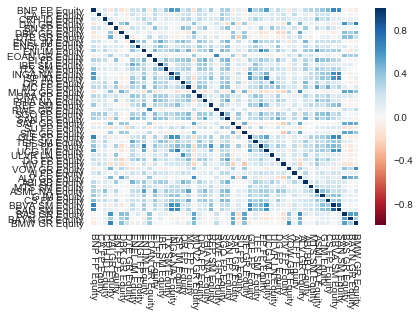

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -717.5      -717.1*   2.603e-312      -717.3*
1       -717.3       -697.9   3.092e-312       -709.7
2       -716.1       -677.6   1.309e-311       -701.0
3       -714.6       -657.1   9.639e-311       -692.0
4       -714.5       -637.9       0.000*       -684.5
5       -715.2       -619.5        0.000       -677.7
6       -717.5       -602.8        0.000       -672.6
7       -722.7       -589.0        0.000       -670.3
8      -733.5*       -580.8        0.000       -673.6
* Minimum



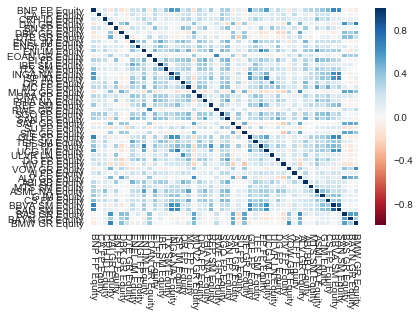

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -726.2      -725.8*   3.978e-316      -726.1*
1       -724.2       -704.7   3.278e-315       -716.5
2       -721.7       -683.2   4.476e-314       -706.6
3       -719.9       -662.4       0.000*       -697.3
4       -719.1       -642.5        0.000       -689.0
5       -719.1       -623.5        0.000       -681.6
6       -721.2       -606.5        0.000       -676.3
7       -725.9       -592.2        0.000       -673.5
8      -736.2*       -583.4        0.000       -676.3
* Minimum



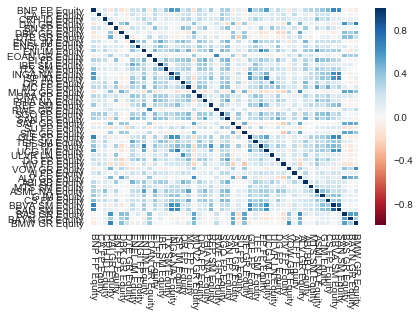

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -707.0      -706.6*   8.975e-308      -706.8*
1       -705.2       -685.8   5.553e-307       -697.6
2       -702.7       -664.2   8.101e-306       -687.6
3       -700.9       -643.3   8.837e-305       -678.3
4       -699.5       -623.0   1.005e-303       -669.5
5       -700.3       -604.7       0.000*       -662.8
6       -702.0       -587.3        0.000       -657.0
7       -706.9       -573.2        0.000       -654.5
8      -716.8*       -564.1        0.000       -657.0
* Minimum



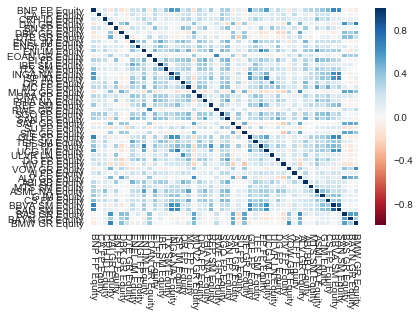

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -736.2      -735.8*   1.865e-320      -736.0*
1       -735.5       -716.1   4.878e-320       -727.9
2       -733.5       -695.0       0.000*       -718.4
3       -732.6       -675.0        0.000       -710.0
4       -731.5       -654.9        0.000       -701.5
5       -732.0       -636.3        0.000       -694.5
6       -734.7       -620.0        0.000       -689.8
7       -740.4       -606.7        0.000       -688.0
8      -752.4*       -599.7        0.000       -692.6
* Minimum



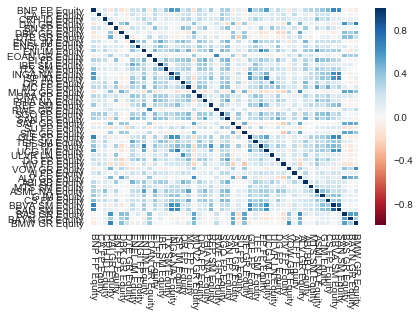

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -748.1      -747.7*       0.000*      -747.9*
1       -746.8       -727.3        0.000       -739.2
2       -744.9       -706.5        0.000       -729.9
3       -743.2       -685.7        0.000       -720.7
4       -742.6       -666.0        0.000       -712.6
5       -743.1       -647.5        0.000       -705.7
6       -744.9       -630.3        0.000       -700.0
7       -750.5       -616.8        0.000       -698.1
8      -761.3*       -608.5        0.000       -701.4
* Minimum



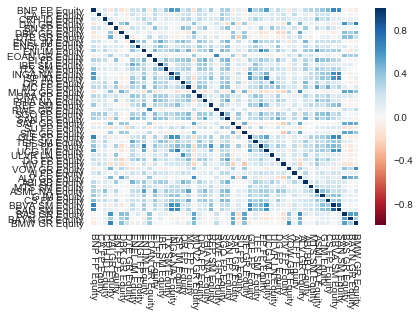

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -730.4      -730.1*   5.894e-318      -730.3*
1       -729.6       -710.2   1.356e-317       -722.0
2       -727.8       -689.3       0.000*       -712.7
3       -726.4       -668.8        0.000       -703.8
4       -726.1       -649.5        0.000       -696.1
5       -727.1       -631.5        0.000       -689.6
6       -729.5       -614.8        0.000       -684.5
7       -735.4       -601.7        0.000       -683.0
8      -745.9*       -593.1        0.000       -686.0
* Minimum



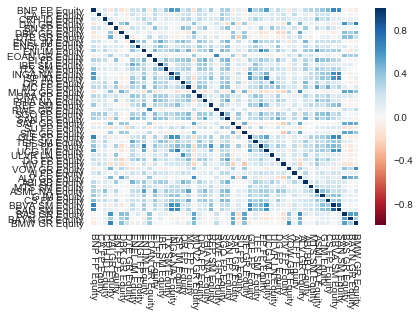

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -736.8      -736.4*   1.015e-320      -736.7*
1       -735.0       -715.6   4.878e-320       -727.4
2       -732.6       -694.1       0.000*       -717.5
3       -730.9       -673.4        0.000       -708.4
4       -729.9       -653.4        0.000       -699.9
5       -730.3       -634.7        0.000       -692.8
6       -732.1       -617.5        0.000       -687.2
7       -735.8       -602.1        0.000       -683.4
8      -746.0*       -593.2        0.000       -686.1
* Minimum



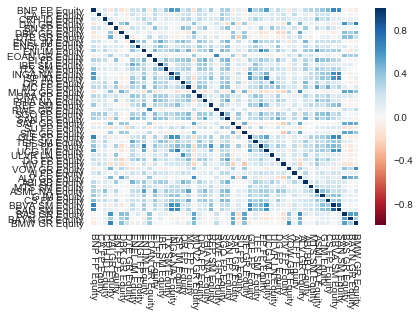

In [54]:
for d in log_rtn['DayOfYear'].unique():
    dailyData = log_rtn[log_rtn['DayOfYear'] == d]
    # remove the last column that specifies the dayOfTheYear
    dailyData = dailyData.iloc[:,:-1]
    modelD = VAR(dailyData)
    # create a dict with all the orders
    best_model = modelD.select_order(maxlags=8)
    best_model
    aic = best_model['aic']
    bic = best_model['bic']
    res = model.fit(maxlags=aic, ic='aic')
    corrMat = pd.DataFrame(res.resid_corr, columns=res.names, index=res.names)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(corrMat, 
                linewidths=0.1, 
                cmap="RdBu", 
                vmin=-1, 
                vmax=1, 
                annot=False)
    plt.xticks(rotation=270)
    plt.show()

In [26]:
log_rtn['DayOfYear'].unique()

array([ 2,  3,  4,  5,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24,
       25, 26, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 43, 44, 45, 46])

In [41]:
dailyData = log_rtn[log_rtn['DayOfYear'] == 37]
# remove the last column that specifies the dayOfTheYear
dailyData = dailyData.iloc[:,:-1]
model = VAR(dailyData)
# create a dict with all the orders
best_model = model.select_order(maxlags=8)
best_model

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -684.1      -683.7*   7.836e-298      -684.0*
1       -686.0       -666.5   1.269e-298       -678.3
2       -686.4       -648.0   9.474e-299       -671.4
3       -686.2       -628.6   2.142e-298       -663.6
4       -687.6       -611.0   1.588e-298       -657.6
5       -689.8       -594.2   1.202e-298       -652.3
6       -693.1       -578.4       0.000*       -648.2
7       -698.0       -564.3        0.000       -645.6
8      -709.5*       -556.8        0.000       -649.7
* Minimum



{'aic': 8, 'bic': 0, 'fpe': 6, 'hqic': 0}

In [43]:
dailyData = log_rtn[log_rtn['DayOfYear'] == 38]
# remove the last column that specifies the dayOfTheYear
dailyData = dailyData.iloc[:,:-1]
model = VAR(dailyData)
# create a dict with all the orders
best_model = model.select_order(maxlags=8)
best_model

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -717.5      -717.1*   2.603e-312      -717.3*
1       -717.3       -697.9   3.092e-312       -709.7
2       -716.1       -677.6   1.309e-311       -701.0
3       -714.6       -657.1   9.639e-311       -692.0
4       -714.5       -637.9       0.000*       -684.5
5       -715.2       -619.5        0.000       -677.7
6       -717.5       -602.8        0.000       -672.6
7       -722.7       -589.0        0.000       -670.3
8      -733.5*       -580.8        0.000       -673.6
* Minimum



{'aic': 8, 'bic': 0, 'fpe': 4, 'hqic': 0}

In [49]:
dailyData = log_rtn[log_rtn['DayOfYear'] == 4]
# remove the last column that specifies the dayOfTheYear
dailyData = dailyData.iloc[:,:-1]
model1 = VAR(dailyData)
# create a dict with all the orders
best_model = model1.select_order(maxlags=8)
best_model

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -755.0      -754.6*       0.000*      -754.9*
1       -752.8       -733.4        0.000       -745.2
2       -749.9       -711.4        0.000       -734.8
3       -747.6       -690.0        0.000       -725.0
4       -746.9       -670.3        0.000       -716.8
5       -746.5       -650.9        0.000       -709.0
6       -748.0       -633.4        0.000       -703.1
7       -753.1       -619.4        0.000       -700.7
8      -762.7*       -610.0        0.000       -702.8
* Minimum



{'aic': 8, 'bic': 0, 'fpe': 0, 'hqic': 0}